# Perform Sentiment Analysis on the given dataset using an LSTM Model.


Import Library

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import re

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Looking into Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine learning datasets/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
english_stops = set(stopwords.words('english'))

Tokenizer for clean numeric data vector

In [ ]:
def load_dataset():
    df = pd.read_csv("/content/drive/MyDrive/Machine learning datasets/IMDB Dataset.csv")
    x_data = df['review']
    y_data = df['sentiment']
    x_data = x_data.replace({'<.*?>': ''}, regex = True)
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])
    x_data = x_data.apply(lambda review: [w.lower() for w in review])
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


<ipython-input-20-c9bb34202455>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_data = y_data.replace('negative', 0)


In [ ]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

Train and fit on the model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Train Set
5740     [another, small, piece, vast, picture, puzzle,...
31954    [well, i, found, nicholson, character, shallow...
30404    [this, movie, complete, waste, time, i, viewed...
44099    [having, heard, quite, positive, reviews, seen...
49285    [when, i, first, watched, show, cartoon, netwo...
                               ...                        
1025     [i, christian, i, always, skeptical, movies, m...
1830     [idea, great, spoiled, big, time, judges, why,...
42405    [i, watched, movie, curiosity, i, wanted, see,...
41412    [as, well, aware, movies, set, direct, incorpo...
48059    [what, point, creating, sequels, absolutely, r...
Name: review, Length: 40000, dtype: object 

30186    [you, seen, tired, worn, clich, sit, com, stor...
35286    [i, laying, bed, flicking, channels, boy, i, c...
5792     [barney, teaches, kids, nothing, here, reasons...
14069    [a, close, sharp, discription, bubbling, dynam...
22327    [wow, all, i, say, elizabeth, montgomery, enem...
 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5450 - loss: 0.6779
Epoch 1: accuracy improved from -inf to 0.59325, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 220ms/step - accuracy: 0.5451 - loss: 0.6779
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6465 - loss: 0.6324
Epoch 2: accuracy improved from 0.59325 to 0.61418, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.6464 - loss: 0.6324
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6002 - loss: 0.6386
Epoch 3: accuracy did not improve from 0.61418
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 210ms/step - accuracy: 0.6002 - loss: 0.6387
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.6030 - loss: 0.6604
Epoch 4: accuracy did not improve from 0.61418
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 217ms/step - accuracy: 0.6030 - loss: 0.6604
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6307 - loss: 0.6450
Epoch 5: accuracy improved from 0.61418 to 0.62103, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.6307 - loss: 0.6450


AttributeError: 'Sequential' object has no attribute 'predict_classes'

Prediction

In [ ]:
y_pred = model.predict(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1
print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))
loaded_model = load_model('models/LSTM.h5')
review = str(input('Movie Review: '))
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)
words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]
print('Filtered: ', filtered)
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)\
result = loaded_model.predict(tokenize_words)
print(result)
if result >= 0.5:
    print('positive')
else:
    print('negative')

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step
Correct Prediction: 0
Wrong Prediction: 10000
Accuracy: 0.0


Movie Review: film ended early
Cleaned:  film ended early
Filtered:  ['film ended early']
[[  4 919 313   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
[[0.5087315]]
positive


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


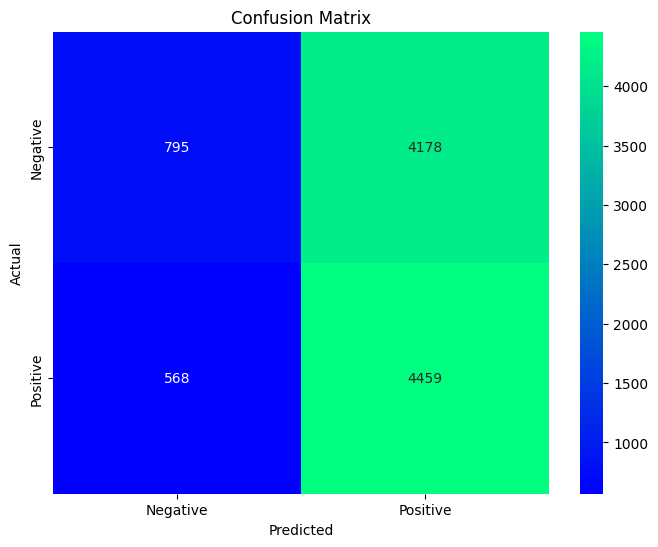

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()